In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
f1 = "../Results/ML_2023-07-14_1HR.pkl"
f2 = "../Results/ML_2023-07-30_1HR.pkl"
f3 = "../Results/ML_2023-08-23_1HR.pkl"
f4 = "../Results/ML_2023-08-31_1HR.pkl"

df1 = pd.read_pickle(f1)  
df2 = pd.read_pickle(f2)  
df3 = pd.read_pickle(f3)  
df4 = pd.read_pickle(f4)  

In [7]:
print( df1['obsTimeUtc'].value_counts() )
print()
print( df2['obsTimeUtc'].value_counts() )
print()
print( df3['obsTimeUtc'].value_counts() )
print()
print( df4['obsTimeUtc'].value_counts() )

obsTimeUtc
2023-07-14 14:59:00+00:00    25940
2023-07-14 14:58:00+00:00      504
Name: count, dtype: int64

obsTimeUtc
2023-07-30 14:59:00+00:00    228507
Name: count, dtype: int64

obsTimeUtc
2023-08-23 14:59:00+00:00    181800
Name: count, dtype: int64

obsTimeUtc
2023-08-31 14:59:00+00:00    209741
2023-08-31 14:58:00+00:00     22817
Name: count, dtype: int64


In [8]:
df2.head(3)

,fahrenheit,zscore,ndvi,lstLat,lstLon,stationID,tz,obsTimeUtc,obsTimeLocal,epoch,...,windchillLow,windchillAvg,heatindexHigh,heatindexLow,heatindexAvg,pressureMax,pressureMin,pressureTrend,precipRate,precipTotal
0,71.39351,0.103809,0.197744,39.368980,-76.710881,LGC,America/New_York,2023-07-30 14:59:00+00:00,2023-07-30 10:59:00,1690729140,...,23.6,24.9,25.9,23.7,24.9,1016.39,1015.92,0.0,0.0,0.0
1,71.47278,0.119911,0.232110,39.368985,-76.710533,LGC,America/New_York,2023-07-30 14:59:00+00:00,2023-07-30 10:59:00,1690729140,...,23.6,24.9,25.9,23.7,24.9,1016.39,1015.92,0.0,0.0,0.0
2,71.44191,0.113641,0.258738,39.368990,-76.710185,LGC,America/New_York,2023-07-30 14:59:00+00:00,2023-07-30 10:59:00,1690729140,...,23.6,24.9,25.9,23.7,24.9,1016.39,1015.92,0.0,0.0,0.0


In [9]:
df3['obsTimeLocal'].value_counts()

obsTimeLocal
2023-08-23 10:59:00    181800
Name: count, dtype: int64

In [10]:
df = pd.concat( [df1,df2] )
df = pd.concat( [df,df3] )
df = pd.concat( [df,df4] )

n1 = df1.shape[0] + df2.shape[0] + df3.shape[0] + df4.shape[0]
n2 = df.shape[0]
print("Expected number of rows:", n1)
print("Number of rows:", n2)

Expected number of rows: 669309
Number of rows: 669309


#### Visualize Spatial Coverage

(-76.8, -76.4)

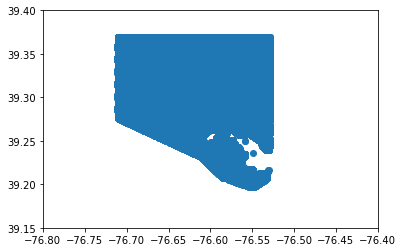

In [11]:
plt.scatter( df['lstLon'], df['lstLat'] )
plt.ylim(39.15,39.4)
plt.xlim(-76.8,-76.4)

### Making sure no null values remain

In [12]:
df.isnull().sum()

fahrenheit            0
zscore                0
ndvi                  0
lstLat                0
lstLon                0
stationID             0
tz                    0
obsTimeUtc            0
obsTimeLocal          0
epoch                 0
bsecLat               0
bsecLon               0
bsecDistance          0
solarRadiationHigh    0
uvHigh                0
winddirAvg            0
humidityHigh          0
humidityLow           0
humidityAvg           0
qcStatus              0
tempHigh              0
tempLow               0
tempAvg               0
windspeedHigh         0
windspeedLow          0
windspeedAvg          0
windgustHigh          0
windgustLow           0
windgustAvg           0
dewptHigh             0
dewptLow              0
dewptAvg              0
windchillHigh         0
windchillLow          0
windchillAvg          0
heatindexHigh         0
heatindexLow          0
heatindexAvg          0
pressureMax           0
pressureMin           0
pressureTrend         0
precipRate      

### Make sure no bad qc data

In [13]:
df['qcStatus'].value_counts()

qcStatus
1    669309
Name: count, dtype: int64

### Additional data filtering of BSEC data

* found pressure trend has fill values of 999.9
* found windspeedAvg has erroneous values - keep values below 300

In [14]:
print("Before:", df.shape)
df = df[ df['pressureTrend'] < 999.9 ]
df = df[ df['windspeedAvg'] < 300. ]
print("After:", df.shape)

Before: (669309, 43)
After: (669309, 43)


In [15]:
df['stationID'].unique()

array(['LGC', 'OG', 'AAC', 'NRP', 'ARK', 'JHU', 'SMF', 'ABL'],
      dtype=object)

Text(0, 0.5, 'Number of Observations')

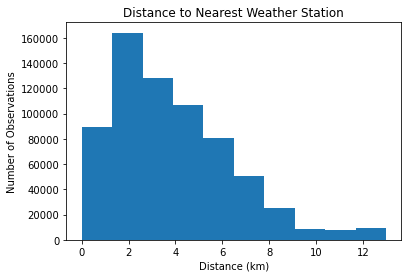

In [16]:
plt.hist( df['bsecDistance'] )
plt.title('Distance to Nearest Weather Station')
plt.xlabel('Distance (km)')
plt.ylabel('Number of Observations')

In [17]:
print( "Mean:", np.mean(df['bsecDistance']) )
print( "Median:", np.median(df['bsecDistance']) )
print( "SD:", np.std(df['bsecDistance']) )

Mean: 3.8861755464842624
Median: 3.371997196538866
SD: 2.527654224451405


Text(0, 0.5, 'Number of Observations')

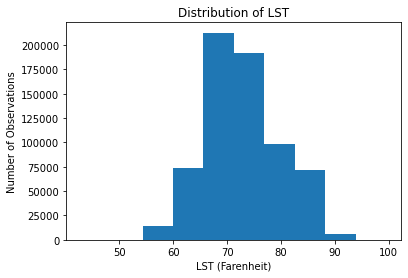

In [18]:
plt.hist( df['fahrenheit'] )
plt.title('Distribution of LST')
plt.xlabel('LST (Farenheit)')
plt.ylabel('Number of Observations')

In [19]:
print( "Mean:", np.mean(df['fahrenheit']) )
print( "Median:", np.median(df['fahrenheit']) )
print( "SD:", np.std(df['fahrenheit']) )

Mean: 72.85970681119933
Median: 71.925415
SD: 6.836092629273296


In [20]:
dfLessThan1 = df[ df['bsecDistance'] < 1 ]
df1to2 = df[ (df['bsecDistance'] >= 1) & (df['bsecDistance'] < 2) ]
df2to3 = df[ (df['bsecDistance'] >= 2) & (df['bsecDistance'] < 3) ]
df3to4 = df[ (df['bsecDistance'] >= 3) & (df['bsecDistance'] < 4) ]
df4orMore = df[ df['bsecDistance'] >= 4 ]

In [21]:
dfLessThan1.shape, df1to2.shape, df2to3.shape, df3to4.shape, df4orMore.shape

((58498, 43), (117687, 43), (122620, 43), (91218, 43), (279286, 43))

In [22]:
df.shape

(669309, 43)

In [23]:
# shuffle the dataframe rows

df = df.sample(frac = 1)
dfLessThan1 = dfLessThan1.sample(frac = 1)
df1to2 = df1to2.sample(frac = 1)
df2to3 = df2to3.sample(frac = 1)
df3to4 = df3to4.sample(frac = 1)
df4orMore = df4orMore.sample(frac = 1)

In [24]:
df.to_pickle("../Results/ML_Data_1HR.pkl")

In [25]:
dfLessThan1.to_pickle("../Results/ML_Data_lt_1_1HR.pkl")
df1to2.to_pickle("../Results/ML_Data_1_to_2_1HR.pkl")
df2to3.to_pickle("../Results/ML_Data_2_to_3_1HR.pkl")
df3to4.to_pickle("../Results/ML_Data_3_to_4_1HR.pkl")
df4orMore.to_pickle("../Results/ML_Data_ge_4_1HR.pkl")